# Chapter 8 Matrices

行列に関してはコメントは少なめです。(~~正直、SympyのMatrix使うぐらいなら、Numpy使ったほうが効率良さそうだよね〜.~~)

In [1]:
from sympy import *
init_printing(use_unicode=True)

`Sympy`で行列を作るには、`Matrix`オブジェクトを使う. たとえば

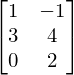

In [2]:
Matrix([
[1, -1],
[3, 4],
[0, 2] ]) #行ベクトルの組み合わせであることを明示するために[]カッコを余分に付けている。

とできる. 列ベクトルは

In [3]:
Matrix([1,2,3]) #([])はベクトル

#### 行列の積

In [4]:
M = Matrix([
[1, 2, 3],
[3, 2, 1] ])

In [5]:
type(M)

sympy.matrices.dense.MutableDenseMatrix

In [6]:
N = Matrix([0, 1, 1])

In [7]:
M*N

**注意**: `Matrix`オブジェクトは`mutable`. 

## 8.1　基本的な演算

### 8.1.1 形(Shape)

In [8]:
M = Matrix([
 [1, 2, 3],
 [-2, 0, 4]
])

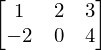

In [9]:
M

In [10]:
M.shape #Numpy同様()はいらない.

(行, 列)

### 8.1.2 行と列を参照する

In [11]:
M.row(0) #1行 0から始まる.

In [12]:
M.col(-1) #3列(負で最終列を参照)

### 8.1.2 行と列の削除 / 挿入

#### 行 / 列の削除

In [13]:
M.col_del(0) # 一列目を削除

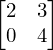

In [14]:
M

In [15]:
M.row_del(1) # 二行目を削除

In [16]:
M

#### 行 /　列の追加

In [17]:
M

In [18]:
M = M.row_insert(1, Matrix([[0, 4]])) #2行目に(0, 4)成分を追加

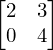

In [19]:
M

In [20]:
M = M.col_insert(0, Matrix([1, -2])) #列ベクトルを追加するのでカッコは一組

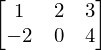

In [21]:
M

## 8.2 基本的な方法

In [22]:
M = Matrix([
    [1, 3],
    [-2,3]
])

In [23]:
N = Matrix([
    [0,3],
    [0,7]
])

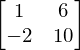

In [24]:
M + N #足し算

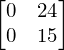

In [25]:
M*N #行列の積

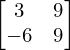

In [26]:
3*M #定数倍

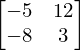

In [27]:
M**2 #べき乗

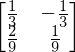

In [28]:
M**-1 #逆行列

In [59]:
N**-1 #行列式がゼロで存在しない.

ValueError: Matrix det == 0; not invertible.

In [30]:
M = Matrix([
    [1, 2, 3],
    [4, 5, 6]
])

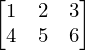

In [31]:
M

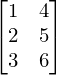

In [32]:
M.T #転置行列

## 8.3 行列の構成

### 8.3.1 単位行列

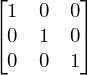

In [33]:
eye(3)

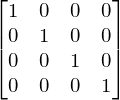

In [34]:
eye(4)

### 8.3.2 ゼロ行列

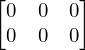

In [35]:
zeros(2,3)

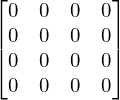

In [36]:
zeros(4)

### 8.3.3 すべての成分が1の行列

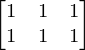

In [37]:
ones(2,3)

### 8.3.4 対角行列

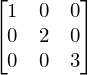

In [38]:
diag(1, 2, 3)

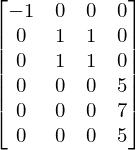

In [39]:
diag(-1, ones(2, 2), Matrix([5, 7, 5])) #複数組み合わせる

## 8.4 高等的な扱い

### 8.4.1 行列式

In [40]:
M = Matrix([
    [1, 0, 1],
    [2, -1, 3],
    [4, 3, 2]
])

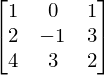

In [41]:
M

In [42]:
M.det()

### 8.4.2 簡約化

In [43]:
M = Matrix([
    [1, 0, 1, 3],
    [2, 3, 4, 7],
    [-1, -3, -3, -4]
])

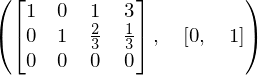

In [44]:
M.rref()

第一引数は簡約化した行列、第二引数はピボット列の添字リスト. この行列のランクは2.

### 8.4.3 ヌル空間

In [45]:
M = Matrix([
    [1, 2, 3, 0, 0],
    [4, 10, 0, 0, 1]
])

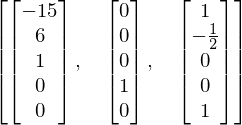

In [46]:
M.nullspace()

--->M*x=0なる方程式の解. ヌル空間の次元は3.

### 8.4.4 列空間

In [47]:
M = Matrix([
    [1, 1, 2],
    [2, 1, 3],
    [3, 1, 4]
])

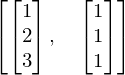

In [48]:
M.columnspace()

### 8.4.5 固有値、固有ベクトル、対角化

In [49]:
M = Matrix([
    [3, -2, 4, -2],
    [5, 3, -3, -2],
    [5, -2, 2, -2],
    [5, -2, -3 ,3]
])

In [50]:
M.eigenvals()

--->固有値 -2 と 3 は多重度1, 固有値5は多重度 3

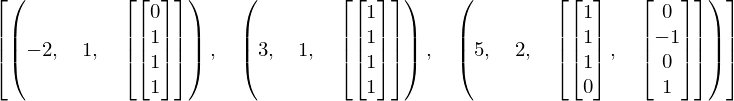

In [51]:
M.eigenvects()

--->固有値とともに固有ベクトルも表示される. 常にコレを使ってもいいが、固有ベクトルの計算は時間がかかるので、固有値だけ欲しければeigenvals()を使うのが吉.

In [52]:
P, D = M.diagonalize()

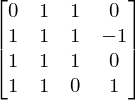

In [53]:
P #直交行列

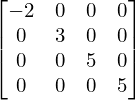

In [54]:
D #対角行列

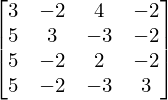

In [55]:
P*D*P**-1

これはMに等しい.

#### 固有方程式

In [56]:
lamda = symbols('lamda') #lambdaは予約語

In [57]:
p = M.charpoly(lamda)

In [58]:
factor(p) #Mの固有方程式